Mounted at /content/drive
0.7063873176301159
119.0
/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv


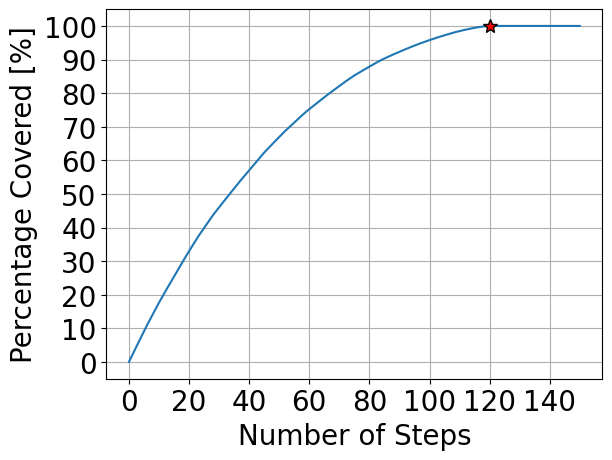

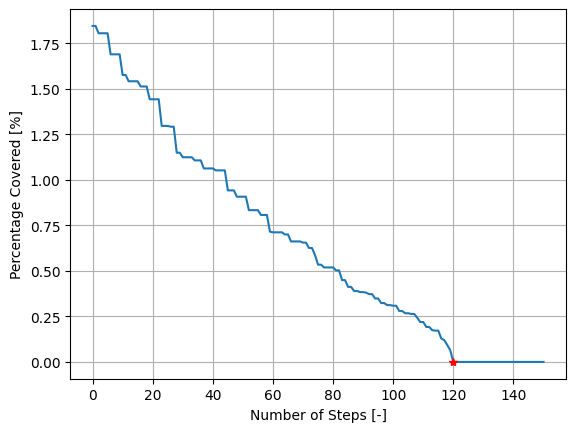

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

grid_dx=10
grid_dy=19

array = np.zeros((grid_dx, grid_dy))

def prob(upper, lower):
    cdf_upper_limit = norm(loc = 0 , scale = 1).cdf(upper)
    cdf_lower_limit = norm(loc = 0 , scale = 1).cdf(lower)

    p = cdf_upper_limit - cdf_lower_limit
    return p

def probability_grid(x, y, sigmas_covered):
    arr = np.zeros((x, y))#the plus one is to pad the array with zeros
    sum=0
    for i in range(x):
        for j in range(y):
            u_x = -sigmas_covered+(2*(sigmas_covered)/x)*(i+1)
            l_x = -sigmas_covered+(2*(sigmas_covered)/x)*(i)
            prob_x = prob(u_x, l_x)

            u_y = -sigmas_covered+(2*(sigmas_covered)/y)*(j+1)
            l_y = -sigmas_covered+(2*(sigmas_covered)/y)*(j)
            prob_y = prob(u_y, l_y)

            p_box = prob_x*prob_y
            sum = sum + p_box
            arr[i, j] = p_box
    return arr, sum

g, sum = probability_grid(grid_dx, grid_dy, 2)

#coords_excluded=[(1, 1), (1, 2), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (4, 7), (5, 7), (2, 12), (4, 12)]
coords_excluded=[(1, 6), (2, 5), (2, 6), (3, 5), (3, 6), (4, 5), (4, 6), (3, 12)]


for i in np.linspace(0, 15, 16):
  for j in np.linspace(0, 7, 8):
    #print(i, j)
    array[int(j), int(i)]=g[int(j), int(i)]


for i in coords_excluded:
  array[i]=0

sum=np.sum(array)
print(sum)

# Creating numpy array
arr = array.flatten()
#print(arr)
# Sort NumPy Array in decreasing order
arr = np.sort(arr)[::-1]
#print(arr)

yyy=[]
reward_max=0
t=1
for i in np.linspace(0, 149, 150):
  reward_max=reward_max+arr[int(i)]
  yyy = np.concatenate((yyy, [reward_max]))
  if reward_max>=0.70638731763 and t==1:
    print(i)
    t=0
    step100=i

xxx=np.linspace(0, 150, 151)

yyy=np.concatenate(([0], yyy))

#grad=np.zeros(len(yyy))

#grad[0]=(yyy[3]-yyy[0])/3
#grad[1]=(yyy[4]-yyy[0])/4
#for i in range(2, int(step100), 1):
  #grad[i]=(yyy[i+3]-yyy[i-2])/5




plt.figure(1)

plt.plot(xxx, yyy*100/reward_max)
plt.plot(step100+1, 100, color='r', marker='*', markeredgecolor='black', markersize=10)
plt.yticks(np.linspace(0, 100, 11), fontsize=20)
plt.xticks(np.linspace(0, 140, 8), fontsize=20)
plt.grid()

plt.xlabel('Number of Steps', fontsize=20)
plt.ylabel('Percentage Covered [%]', fontsize=20)

plt.figure(2)


#plt.plot(xxx, arr[0:151]*100/reward_max)
plt.plot(xxx, arr[0:len(xxx)]*100/reward_max)
plt.plot(step100+1, 0, color='r', marker='*')
plt.grid()

plt.xlabel('Number of Steps [-]')
plt.ylabel('Percentage Covered [%]')

data_array = np.vstack((xxx, yyy*100/reward_max, arr[0:len(xxx)]*100/reward_max))

import csv

# field names
#fields = ['Episode', 'Reward', 'Trials']

# data rows of csv file
rows = data_array

# name of csv file
#filename = "university_records.csv"
filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv'
print(filename)

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    #csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)

#print(g)

#g[Y_pos, X_pos] = 0